## Aim:
##### The main objective of this project is to identify fraudulent transactions while reducing the number of false positives for fraud classifications using machine learning-based techniques like Random Forest Classifier, Linear Regression, XGBoost, and a deep learning technique called Multi-Layer Perceptron, as well as to offer a perspective for algorithm performance analysis.


### Steps Followed: 

1. EDA with Visualization to understand the data
2. Feature Engineering
3. Data Preprocessing - Data Undersampling
4. Model Building & Train the Models
5. Make Predictions
6. Evaluate Model Performance
7. Visualize Results on Confusion Matrices and ROC Curves

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import seaborn as sbn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

### Evaluating the Credit Card Dataset by performing EDA Techniques

Reading the dataset file named: 'creditcard.csv'

In [2]:
credit_card_ds = pd.read_csv('/Users/riyavirani/NEU/ADS/Assignment 2/creditcard.csv')

Checking the data by viewing it's description and first five rows

In [3]:
credit_card_ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
credit_card_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


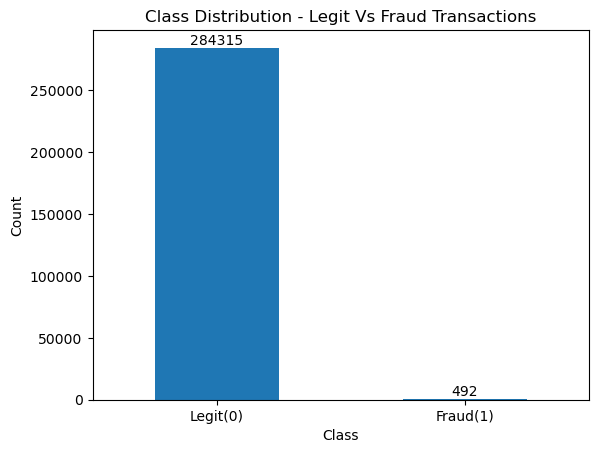

In [5]:
#Counting the number of legit and fraud transactions in the Class Column

value_counts = credit_card_ds['Class'].value_counts()
print(value_counts)
bar = value_counts.plot.bar()
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution - Legit Vs Fraud Transactions')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

In [6]:
#Checking null values in the dataset

print(credit_card_ds.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


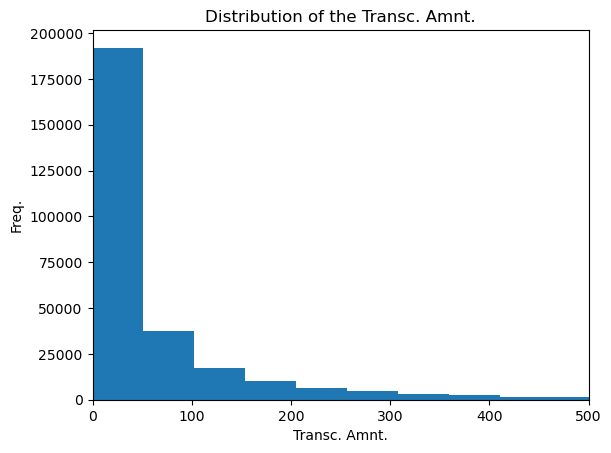

In [7]:
#Plotting histogram across Amount to check the distribution

plt.hist(credit_card_ds['Amount'], bins=500)
plt.xlabel('Transc. Amnt.')
plt.ylabel('Freq.')
plt.title('Distribution of the Transc. Amnt.')
plt.xlim(0, 500)
plt.show()

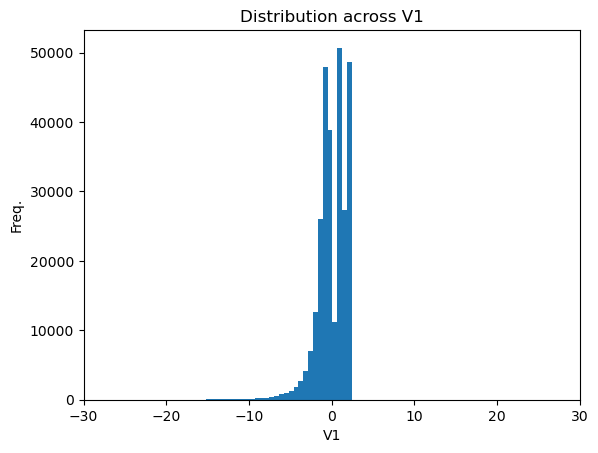

In [8]:
#Plotting histogram across one of the PCA Vectors, in this case V1 for checking the distribution

plt.hist(credit_card_ds['V1'], bins=100)
plt.xlabel('V1')
plt.ylabel('Freq.')
plt.title('Distribution across V1')
plt.xlim(-30, 30)
plt.show()

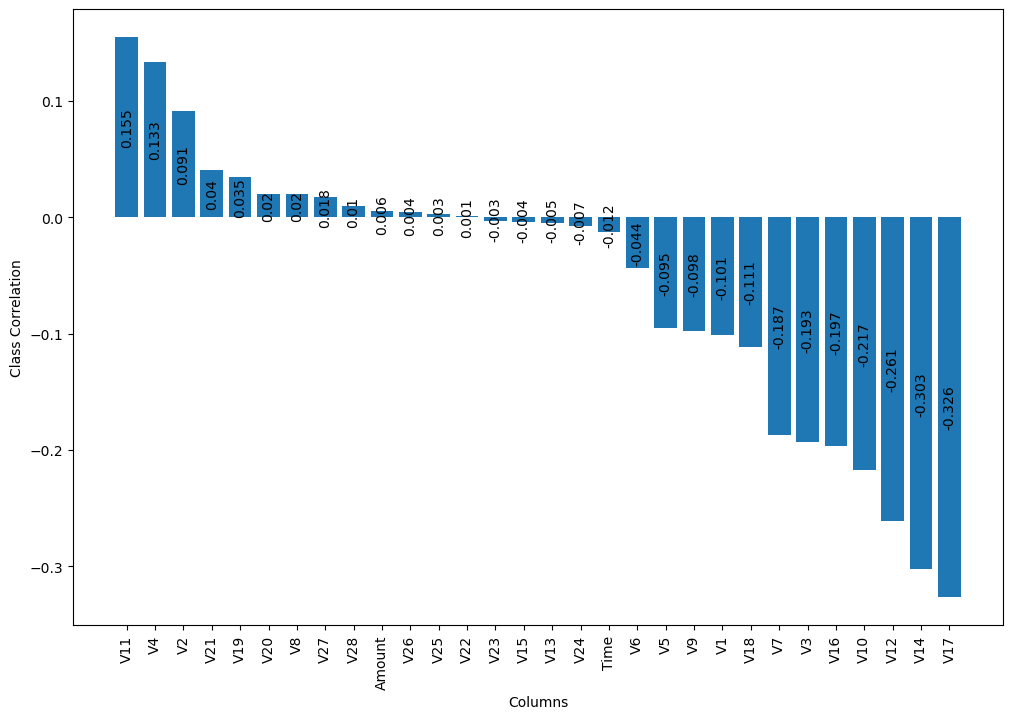

In [9]:
corr = credit_card_ds.corr()['Class']

# drop the Class column
corr = corr.drop(['Class'])

# sort correlation values in descending order
corr_sorted = corr.sort_values(ascending=False)

# create bar chart of correlations
plt.figure(figsize=(12,8))
bars = plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Class Correlation')
plt.bar_label(bars, labels=corr_sorted.values.round(3), label_type='center', rotation=90)
    
plt.show()

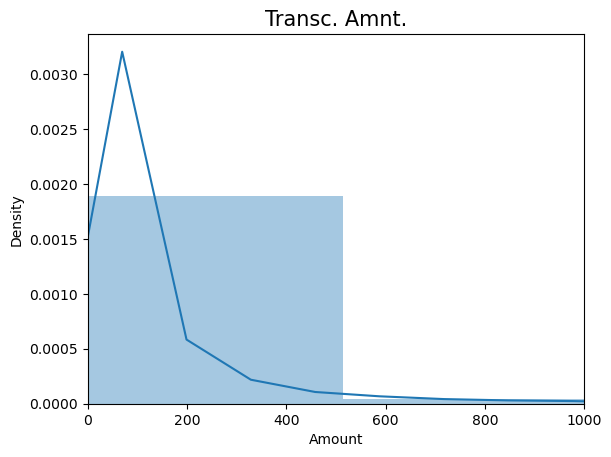

In [10]:
#Distribution of Amount

sbn.distplot(credit_card_ds['Amount'].values)
plt.title('Transc. Amnt.', fontsize=15)
plt.xlim([min(credit_card_ds['Amount'].values),1000])
plt.xlabel('Amount')

plt.show()

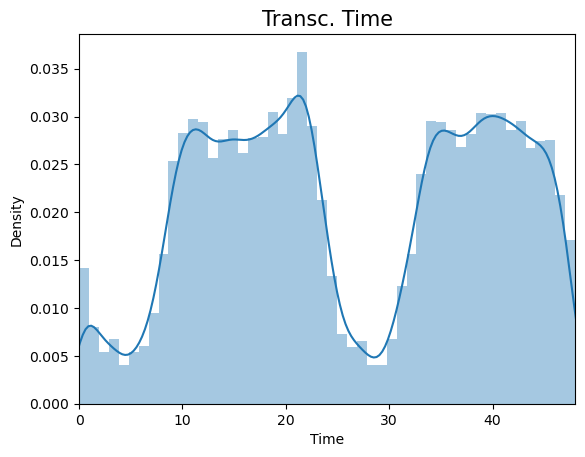

In [11]:
#Distribution of Time

sbn.distplot(credit_card_ds['Time'].values/(60*60))
plt.title('Transc. Time', fontsize=15)
plt.xlim([min(credit_card_ds['Time'].values/(60*60)), max(credit_card_ds['Time'].values/(60*60))])
plt.xlabel('Time')

plt.show()

Text(0.5, 1.0, 'Skewness of Features')

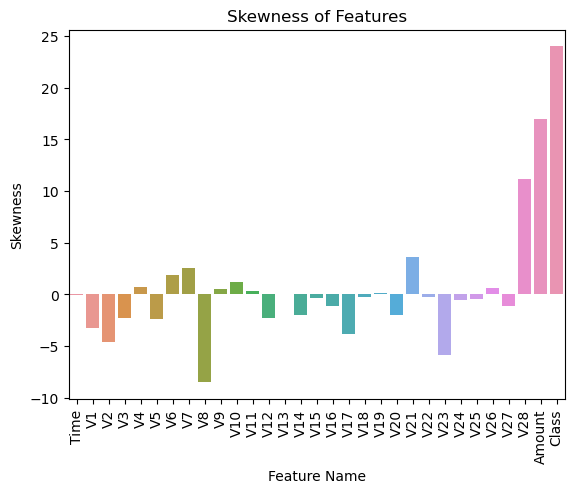

In [12]:
# Compute the skewness of each feature
skewness = credit_card_ds.skew()

# Create a bar chart showing the skewness of each feature
skew_plt = sbn.barplot(x=skewness.index, y=skewness.values)
skew_plt.set_xticklabels(skewness.index, rotation=90)
skew_plt.set_xlabel('Feature Name')
skew_plt.set_ylabel('Skewness')
skew_plt.set_title('Skewness of Features')

Text(0.5, 1.0, 'Original Skewness Dstrbn.')

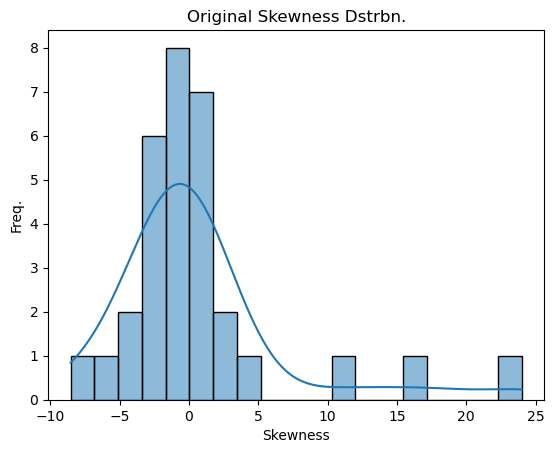

In [13]:
org_skew = credit_card_ds.skew()

sbn.histplot(org_skew, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Freq.')
plt.title('Original Skewness Dstrbn.')

Text(0.5, 1.0, 'New Skewness Dstrbn.')

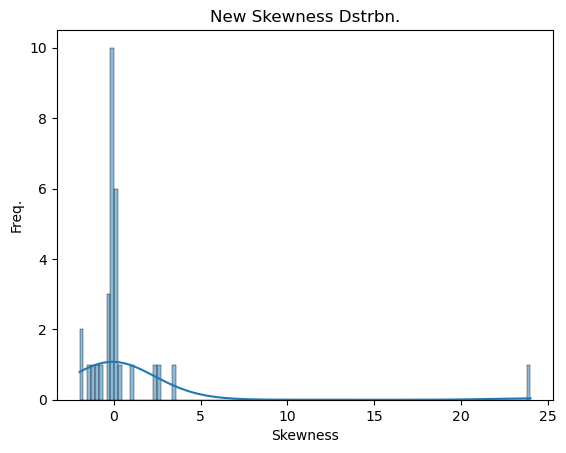

In [14]:
# Create a PowerTransformer object
powerT = PowerTransformer(method='yeo-johnson')

# Fitting the power transformer to the data
powerT.fit(credit_card_ds)

# Transforming the data using the fitted transformer
changed_data = powerT.transform(credit_card_ds)

# Converting the transformed data back to a DataFrame
changed_data = pd.DataFrame(changed_data, columns=credit_card_ds.columns)

#Checking the skewness of the transformed data

new_skew = changed_data.skew()

sbn.histplot(new_skew, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Freq.')
plt.title('New Skewness Dstrbn.')

### Observation:

- The data includes 8 Rows and 31 Columns. 

- The Columns Names from V1 to V28 are hidden as it contains people's confidential transactional information. Hence they are already converted to PCA Vectors.

- There's Time and Amount column and also the Class column represents if the transaction is a fraud or not. '0' means it's not a fraud and '1' means it's a fraud. On further analysis, it can be seen that the amount of frauds (492) in the data are much less than the legit transactions (284315). This indicates the data is highly unbalanced and might require undersampling or oversampling.

- The data does not have any null values in any of the columns.

- From the histograms, it can be observed that the data has maximum transactional amounts below 100 with a mean of 88. The values of PCA vector V1 are maximum between -5 to 5.

- Further, the skewness was also checked across each column by plotting its distribution across histogram and I have fixed it using a Power Transformer

### Feature Engineering

###### Created a new feature 'Amount_Relative' representing the transaction amount relative to the average amount for each class

In [21]:
# Initialize the new feature with the original 'Amount' column
credit_card_ds['Amount_Relative'] = credit_card_ds['Amount']

# Calculate the mean transaction amount for each class
average_amount_by_class = credit_card_ds.groupby('Class')['Amount'].transform('mean')

# Calculate the relative transaction amount
credit_card_ds['Amount_Relative'] = credit_card_ds['Amount'] / average_amount_by_class

# Now the 'Amount_Relative' feature represents the transaction amount relative to the average for its class.
# The updated 'credit_card_ds' DataFrame now includes the 'Amount_Relative' feature.


### Sampling the data
#### From the observations we found out that the data is highly unbalanced, hence we are going to perform oversampling on the fraud values and then undersampling on the legit values to match the count of legit and fraud transactions

In [22]:
#Oversampling the fraud values to 3000 Count
cls_0 = credit_card_ds[credit_card_ds['Class'] == 0]
cls_1 = credit_card_ds[credit_card_ds['Class'] == 1]
cls_1_over = cls_1.sample(3000, replace=True)
test_over = pd.concat([cls_1_over, cls_0], axis=0)

In [23]:
#Undersampling the legit values to 3000 Count
input = test_over.drop('Class',axis = 1)
labels = test_over['Class']

sampler = NearMiss(n_neighbors=10)
S,r = sampler.fit_resample(input,labels)

0    3000
1    3000
Name: Class, dtype: int64


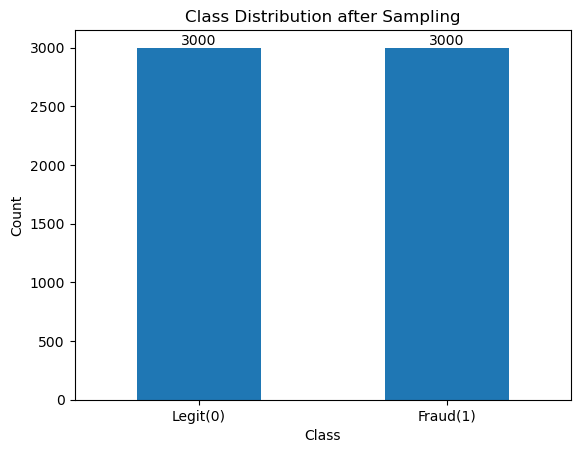

In [24]:
#Counts of legit and fraud values in the sampled dataset
print(r.value_counts())
fig, ax = plt.subplots()
bar = r.value_counts().plot(kind='bar')
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution after Sampling')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

#### Now that we have completed the sampling, the data is now balanced, we will continue with spliting the data into Training and Testing

In [25]:
#Splitting the dataset - 70% for Training and 30% for Testing

R_trn, R_tst, s_trn, s_tst = train_test_split(S, r, test_size=0.3, random_state=4, stratify=r)
scaler = RobustScaler()
R_trn = scaler.fit_transform(R_trn)
R_tst = scaler.fit_transform(R_tst)

### Proceeding to Modeling and Predictions
### 1. Random Forest Modeling

Cross-validation Scores: [0.99761905 1.         1.         0.9952381  1.         0.99761905
 0.99047619 1.         1.         0.99761905]
Cross-validation Average Score: 0.9978571428571428


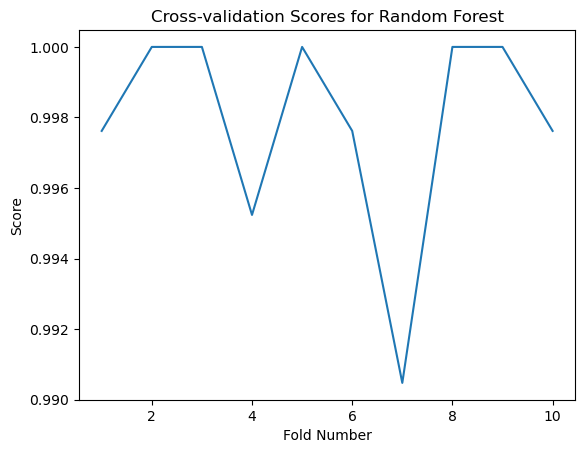

In [26]:
n = 50

#Load Random Forest Classifier Model
RFMod = RandomForestClassifier(n, random_state = 2)

cvs = cross_val_score(RFMod, R_trn , s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Random Forest')
plt.show()

In [27]:
# Fit the model on the training data
RFMod.fit(R_trn ,s_trn)

# Predict the outputs for the training data
trains = RFMod.predict(R_trn )
print('Training Set Results for Random Forest:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn,trains.round()))
rfacc=round(accuracy_score(s_trn,trains.round())*100,2)
print('Training Set Accuracy for Random Forest: '+str(rfacc)+'%')
print()

# Predict the outputs for the testing data
preds = RFMod.predict(R_tst)
print('Testing Set Results for Random Forest:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst,preds.round()))
rfacc=round(accuracy_score(s_tst,preds.round())*100,2)
print('Testing Set Accuracy for Random Forest: '+str(rfacc)+'%')

Training Set Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for Random Forest: 100.0%

Testing Set Results for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       900
           1       1.00      0.97      0.98       900

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800

Testing Set Accuracy for Random Forest: 98.11%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

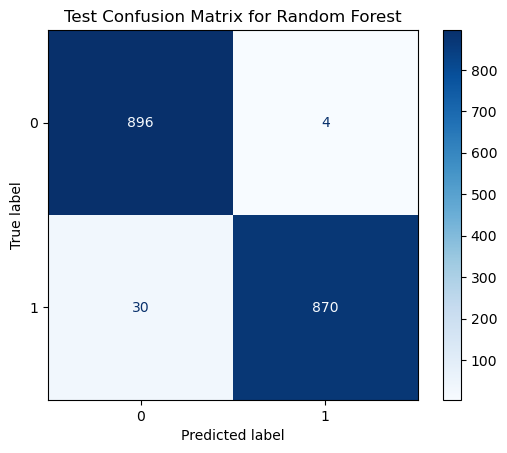

In [28]:
conf_matrx = confusion_matrix(s_tst, preds.round())

# Use ConfusionMatrixDisplay from scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx, display_labels=RFMod.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for Random Forest')
plt.show()

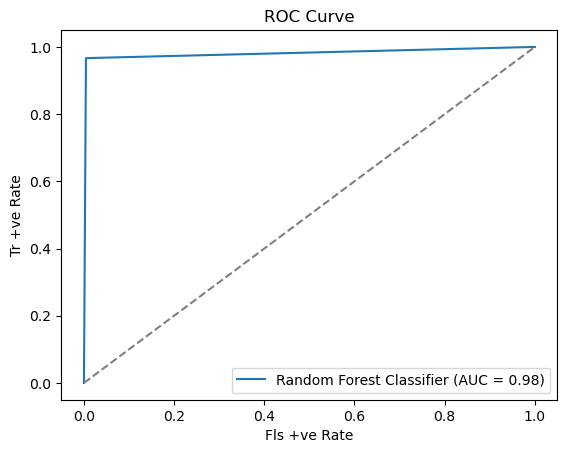

In [29]:
# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, preds)

# Calculate AUC score
auc = roc_auc_score(s_tst, preds)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Fls +ve Rate')
plt.ylabel('Tr +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 2. Logistic Regression Modeling

Cross-validation Scores: [0.96904762 0.98333333 0.96904762 0.96428571 0.97142857 0.9547619
 0.96428571 0.96904762 0.96428571 0.97619048]
Cross-validation Average Score: 0.9685714285714285


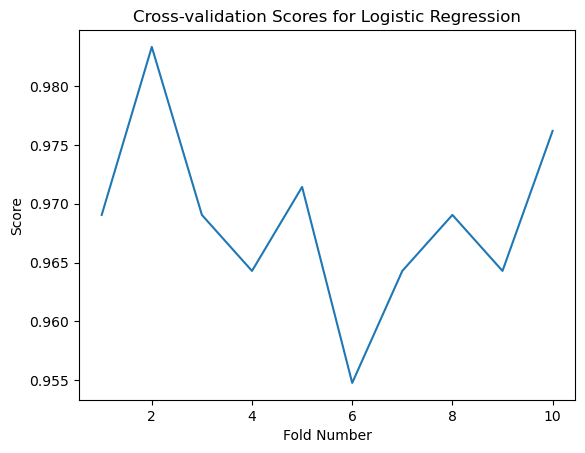

In [30]:
# Initialize Logistic Regression Model
LRMod = LogisticRegression(random_state=2)

# Cross-validation
cvs = cross_val_score(LRMod, R_trn, s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

# Plot Cross-validation Scores
plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Logistic Regression')
plt.show()

In [31]:
# Fit the Logistic Regression model on the training data
LRMod.fit(R_trn, s_trn)

# Predict the outputs for the training data
trains = LRMod.predict(R_trn)
print('Training Set Results for Logistic Regression:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn, trains.round()))
lr_acc = round(accuracy_score(s_trn, trains.round()) * 100, 2)
print('Training Set Accuracy for Logistic Regression: ' + str(lr_acc) + '%')
print()

# Predict the outputs for the testing data
preds = LRMod.predict(R_tst)
print('Testing Set Results for Logistic Regression:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst, preds.round()))
lr_acc = round(accuracy_score(s_tst, preds.round()) * 100, 2)
print('Testing Set Accuracy for Logistic Regression: ' + str(lr_acc) + '%')

Training Set Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2100
           1       0.99      0.95      0.97      2100

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

Training Set Accuracy for Logistic Regression: 96.88%

Testing Set Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       900
           1       0.98      0.95      0.97       900

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800

Testing Set Accuracy for Logistic Regression: 96.72%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

In [32]:
# Calculate the confusion matrix for Logistic Regression
conf_matrx = confusion_matrix(s_tst, preds.round())
conf_matrx

array([[884,  16],
       [ 43, 857]])

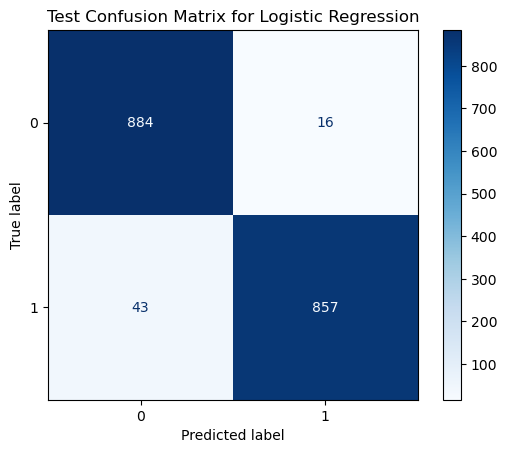

In [33]:
# Use ConfusionMatrixDisplay from scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx, display_labels=LRMod.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for Logistic Regression')
plt.show()

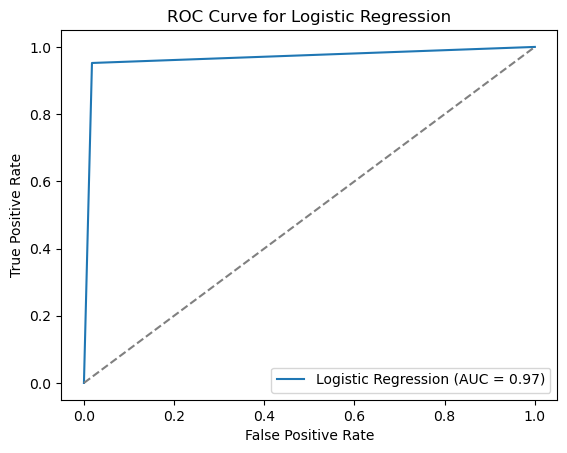

In [34]:
# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, preds)

# Calculate AUC score
auc = roc_auc_score(s_tst, preds)

# Plot ROC curve for Logistic Regression
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

### 3. XGBoost

Cross-validation Scores: [0.99761905 1.         1.         0.99285714 1.         0.99761905
 0.9952381  0.99761905 1.         0.9952381 ]
Cross-validation Average Score: 0.9976190476190476


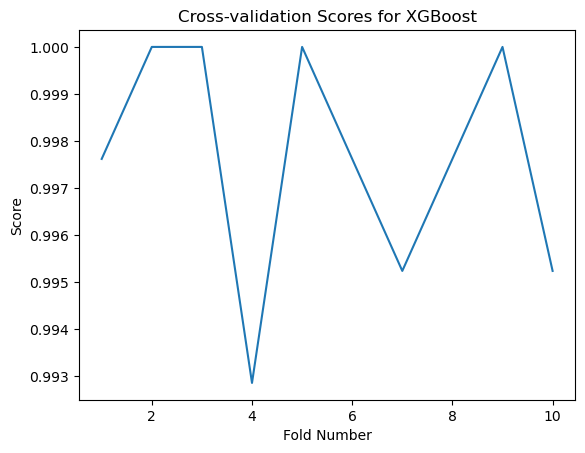

In [35]:
n = 50

# Load XGBoost Classifier Model
XGMod = XGBClassifier(n_estimators=n, random_state=2)

# Cross-validation
cvs = cross_val_score(XGMod, R_trn, s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for XGBoost')
plt.show()

In [36]:
# Fit the model on the training data
XGMod.fit(R_trn, s_trn)

# Predict the outputs for the training data
trains = XGMod.predict(R_trn)
print('Training Set Results for XGBoost:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn, trains.round()))
xgacc = round(accuracy_score(s_trn, trains.round()) * 100, 2)
print('Training Set Accuracy for XGBoost: ' + str(xgacc) + '%')
print()

# Predict the outputs for the testing data
preds = XGMod.predict(R_tst)
print('Testing Set Results for XGBoost:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst, preds.round()))
xgacc = round(accuracy_score(s_tst, preds.round()) * 100, 2)
print('Testing Set Accuracy for XGBoost: ' + str(xgacc) + '%')


Training Set Results for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for XGBoost: 100.0%

Testing Set Results for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       900
           1       0.99      0.97      0.98       900

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800

Testing Set Accuracy for XGBoost: 98.17%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

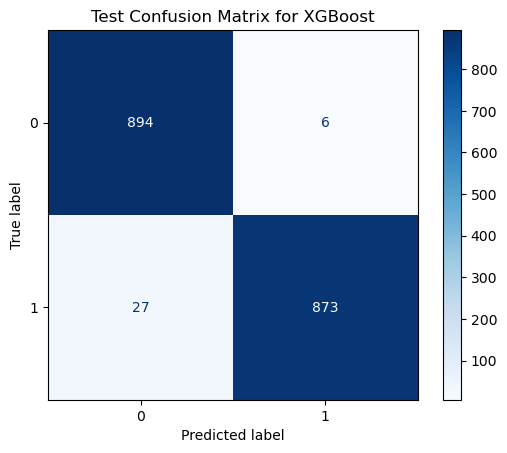

In [37]:
# Plotting the Confusion Matrix and the ROC to determine the outcomes

conf_matrx = confusion_matrix(s_tst, preds.round())

# Use ConfusionMatrixDisplay from scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx, display_labels=XGMod.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for XGBoost')
plt.show()

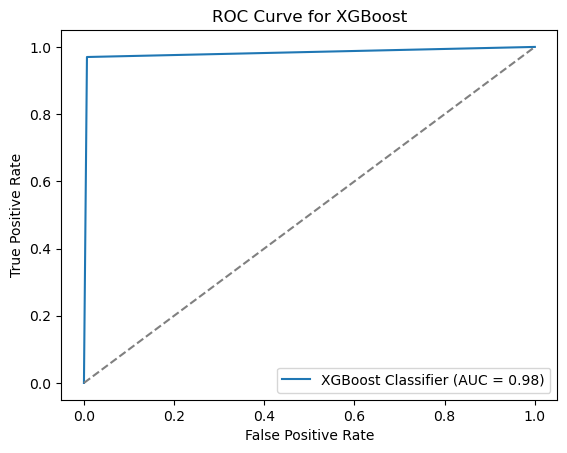

In [38]:
# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, preds)

# Calculate AUC score
auc = roc_auc_score(s_tst, preds)

# Plot ROC curve for XGBoost
plt.plot(fpr, tpr, label=f'XGBoost Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

### 4. Multi-Layer Perceptron

Cross-validation Scores: [0.99761905 0.99761905 0.99285714 0.99285714 1.         0.99047619
 0.98333333 0.99761905 1.         0.99761905]
Cross-validation Average Score: 0.9949999999999999


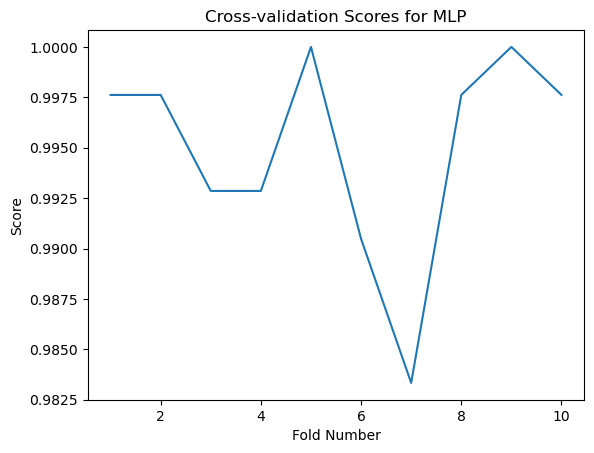

In [39]:
n = 50

# Load MLP Classifier Model
MLPMod = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=2)  # Example architecture

# Cross-validation
cvs = cross_val_score(MLPMod, R_trn, s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for MLP')
plt.show()

In [40]:
# Fit the model on the training data
MLPMod.fit(R_trn, s_trn)

# Predict the outputs for the training data
trains = MLPMod.predict(R_trn)
print('Training Set Results for MLP:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn, trains.round()))
mlp_acc = round(accuracy_score(s_trn, trains.round()) * 100, 2)
print('Training Set Accuracy for MLP: ' + str(mlp_acc) + '%')
print()

# Predict the outputs for the testing data
preds = MLPMod.predict(R_tst)
print('Testing Set Results for MLP:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst, preds.round()))
mlp_acc = round(accuracy_score(s_tst, preds.round()) * 100, 2)
print('Testing Set Accuracy for MLP: ' + str(mlp_acc) + '%')

Training Set Results for MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for MLP: 99.98%

Testing Set Results for MLP:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       900
           1       0.99      1.00      0.99       900

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

Testing Set Accuracy for MLP: 99.28%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

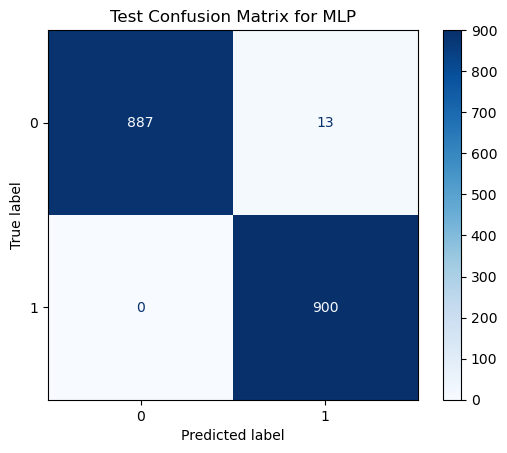

In [41]:
# Plotting the Confusion Matrix and the ROC to determine the outcomes

conf_matrx = confusion_matrix(s_tst, preds.round())

# Use ConfusionMatrixDisplay from scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx, display_labels=MLPMod.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for MLP')
plt.show()

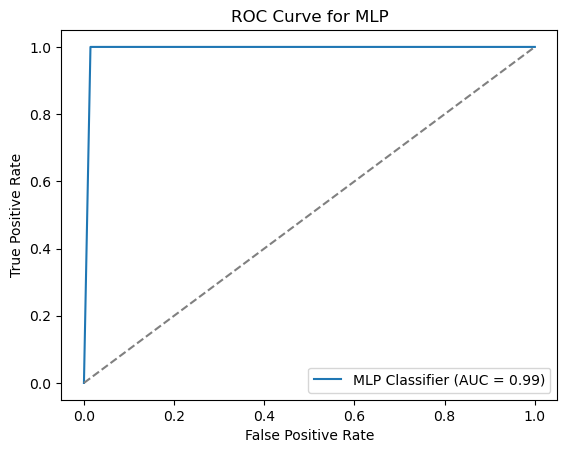

In [42]:
# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, preds)

# Calculate AUC score
auc = roc_auc_score(s_tst, preds)

# Plot ROC curve for MLP
plt.plot(fpr, tpr, label=f'MLP Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP')
plt.legend()
plt.show()